
# 4.1: Plot firing pattern

This example demonstrates how to inspect the firing
pattern of cells in the HNN model.


In [1]:
# Authors: Mainak Jas <mjas@harvard.mgh.edu>
#          Nick Tolley <nick nicholas_tolley@brown.edu>

import os.path as op
import tempfile

Let us import ``hnn_core``.



In [2]:
import hnn_core
from hnn_core import read_spikes, jones_2009_model, simulate_dipole

--No graphics will be displayed.


Now let's build the network. We have used the same weights as in the
[ERP example](https://dylansdaniels.github.io/website_redesign/content/05_erps/hnn_core.html).



In [3]:
import matplotlib.pyplot as plt

net = jones_2009_model()

``net`` does not have any driving inputs and only defines the local network
connectivity. Let us go ahead and first add a distal evoked drive.
We need to define the AMPA and NMDA weights for the connections. An
"evoked drive" defines inputs that are normally distributed with a certain
mean and standard deviation.



In [4]:
weights_ampa_d1 = {'L2_basket': 0.006562, 'L2_pyramidal': 7e-6,
                   'L5_pyramidal': 0.142300}
weights_nmda_d1 = {'L2_basket': 0.019482, 'L2_pyramidal': 0.004317,
                   'L5_pyramidal': 0.080074}
synaptic_delays_d1 = {'L2_basket': 0.1, 'L2_pyramidal': 0.1,
                      'L5_pyramidal': 0.1}
net.add_evoked_drive(
    'evdist1', mu=63.53, sigma=3.85, numspikes=1, weights_ampa=weights_ampa_d1,
    weights_nmda=weights_nmda_d1, location='distal',
    synaptic_delays=synaptic_delays_d1, event_seed=274)

The reason it is called an "evoked drive" is it can be used to simulate
waveforms resembling evoked responses. Here, we show how to do it with two
proximal drives which drive current up the dendrite and one distal drive
which drives current down the dendrite producing the negative deflection.



In [5]:
weights_ampa_p1 = {'L2_basket': 0.08831, 'L2_pyramidal': 0.01525,
                   'L5_basket': 0.19934, 'L5_pyramidal': 0.00865}
synaptic_delays_prox = {'L2_basket': 0.1, 'L2_pyramidal': 0.1,
                        'L5_basket': 1., 'L5_pyramidal': 1.}

# all NMDA weights are zero; pass None explicitly
net.add_evoked_drive(
    'evprox1', mu=26.61, sigma=2.47, numspikes=1, weights_ampa=weights_ampa_p1,
    weights_nmda=None, location='proximal',
    synaptic_delays=synaptic_delays_prox, event_seed=544)

Now we add the second proximal evoked drive and simulate the network
dynamics with somatic voltage recordings enabled. Note: only AMPA weights
differ from first.



In [6]:
weights_ampa_p2 = {'L2_basket': 0.000003, 'L2_pyramidal': 1.438840,
                   'L5_basket': 0.008958, 'L5_pyramidal': 0.684013}
# all NMDA weights are zero; omit weights_nmda (defaults to None)
net.add_evoked_drive(
    'evprox2', mu=137.12, sigma=8.33, numspikes=1,
    weights_ampa=weights_ampa_p2, location='proximal',
    synaptic_delays=synaptic_delays_prox, event_seed=814)

dpls = simulate_dipole(net, tstop=170., record_vsec='soma')

Joblib will run 1 trial(s) in parallel by distributing trials over 1 jobs.
Loading custom mechanism files from /Users/austinsoplata/rep/brn/hnn-core/hnn_core/mod/arm64/.libs/libnrnmech.so
Building the NEURON model
[Done]
Trial 1: 0.03 ms...
Trial 1: 10.0 ms...
Trial 1: 20.0 ms...
Trial 1: 30.0 ms...
Trial 1: 40.0 ms...
Trial 1: 50.0 ms...
Trial 1: 60.0 ms...
Trial 1: 70.0 ms...
Trial 1: 80.0 ms...
Trial 1: 90.0 ms...
Trial 1: 100.0 ms...
Trial 1: 110.0 ms...
Trial 1: 120.0 ms...
Trial 1: 130.0 ms...
Trial 1: 140.0 ms...
Trial 1: 150.0 ms...
Trial 1: 160.0 ms...


Here, we explain more details about the data structures and how they can
be used to better interpret the data. The cell IDs (gids) uniquely define
neurons in the network and are stored in the 
[Network](https://jonescompneurolab.github.io/hnn-core/stable/generated/hnn_core.Network.html#hnn_core.Network)
object as a dictionary

In [7]:
gid_ranges = net.gid_ranges
print(net.gid_ranges)

OrderedDict({'L2_basket': range(0, 35), 'L2_pyramidal': range(35, 135), 'L5_basket': range(135, 170), 'L5_pyramidal': range(170, 270), 'evdist1': range(270, 505), 'evprox1': range(505, 775), 'evprox2': range(775, 1045)})


Simulated voltage in the soma and other cell sections are stored in
[CellResponse](https://jonescompneurolab.github.io/hnn-core/stable/generated/hnn_core.CellResponse.html#hnn_core.CellResponse)
as a dictionary. The CellResponse object
stores data produced by individual cells including spikes,
voltages and currents.

In [8]:
trial_idx = 0
vsec = net.cell_response.vsec[trial_idx]
print(vsec.keys())

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,

We can plot the firing pattern of individual cells by indexing with the gid



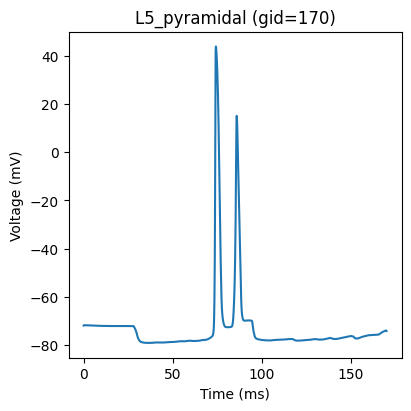

In [9]:
gid = 170
plt.figure(figsize=(4, 4), constrained_layout=True)
plt.plot(net.cell_response.times, vsec[gid]['soma'])
plt.title('%s (gid=%d)' % (net.gid_to_type(gid), gid))
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.show()

Also, we can plot the spikes in the network and write them to text files.
Note that we can use formatting syntax to specify the filename pattern
with which each trial will be written `('spk_1.txt', 'spk_2.txt, ...)`. To
read spikes back in, we can use wildcard expressions.

Writing file /var/folders/cs/5b2dq2192v52fd3j8ppbtcg80000gp/T/tmpuph5_i7d/spk_0.txt


/var/folders/cs/5b2dq2192v52fd3j8ppbtcg80000gp/T/ipykernel_98538/2386154288.py:4: DeprecationWarning: Reading cell response from txt files is deprecated and will be removed in future versions. Please load cell response along with simulated network
  cell_response = read_spikes(op.join(tmp_dir_name, 'spk_*.txt'))


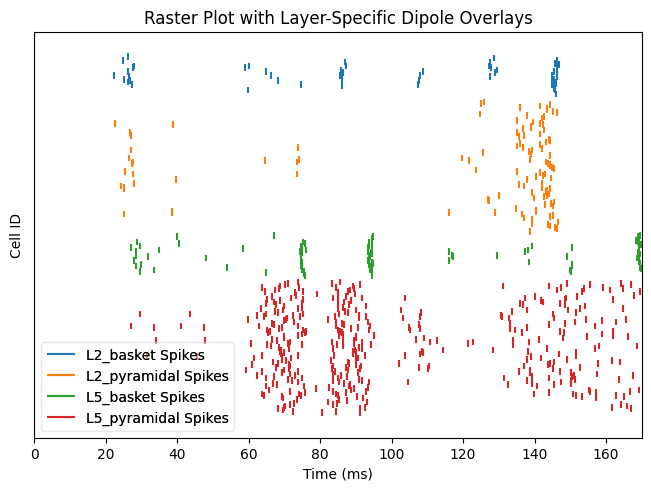

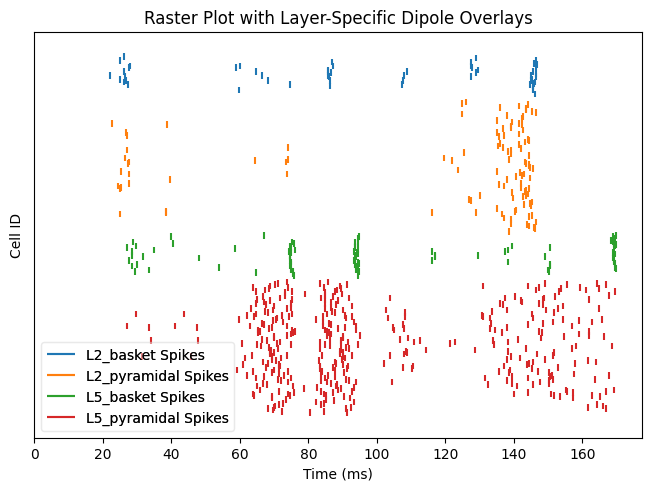

In [10]:
net.cell_response.plot_spikes_raster(show=False)
with tempfile.TemporaryDirectory() as tmp_dir_name:
    net.cell_response.write(op.join(tmp_dir_name, 'spk_%d.txt'))
    cell_response = read_spikes(op.join(tmp_dir_name, 'spk_*.txt'))
cell_response.plot_spikes_raster(show=False)
plt.show()

We can additionally calculate the mean spike rates for each cell class by
specifying a time window with ``tstart`` and ``tstop``.



In [11]:
all_rates = cell_response.mean_rates(tstart=0, tstop=170,
                                     gid_ranges=net.gid_ranges,
                                     mean_type='all')
trial_rates = cell_response.mean_rates(tstart=0, tstop=170,
                                       gid_ranges=net.gid_ranges,
                                       mean_type='trial')
print('Mean spike rates across trials:')
print(all_rates)
print('Mean spike rates for individual trials:')
print(trial_rates)

Mean spike rates across trials:
{'L2_basket': 9.243697478991596, 'L2_pyramidal': 6.705882352941176, 'L5_basket': 15.126050420168063, 'L5_pyramidal': 23.176470588235297}
Mean spike rates for individual trials:
{'L2_basket': [9.243697478991596], 'L2_pyramidal': [6.705882352941176], 'L5_basket': [15.126050420168063], 'L5_pyramidal': [23.176470588235297]}


Finally, we can plot the soma voltage along with the spiking activity with
raster plots and histograms for the pyramidal cells.



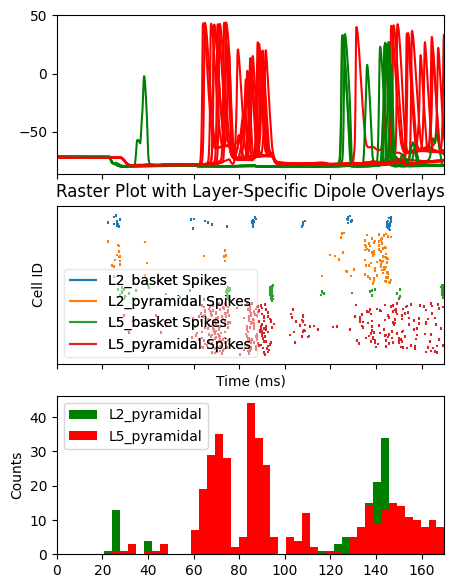

In [12]:
fig, axes = plt.subplots(3, 1, figsize=(5, 7), sharex=True)

for idx in range(10):  # only 10 cells per cell-type
    gid = gid_ranges['L2_pyramidal'][idx]
    axes[0].plot(net.cell_response.times, vsec[gid]['soma'], color='g')
    gid = gid_ranges['L5_pyramidal'][idx]
    axes[0].plot(net.cell_response.times, vsec[gid]['soma'], color='r')

net.cell_response.plot_spikes_raster(ax=axes[1], show=False)
net.cell_response.plot_spikes_hist(ax=axes[2],
                                   spike_types=['L5_pyramidal',
                                                'L2_pyramidal'],
                                   show=False)
plt.show()